In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns

# Pegando os dados
No capítulo do livro o autor utiliza duas funções para trazer o arquivo, como a url raw do arquivo está disponível no github, não há necessidade de repetir as mesmas funções

In [4]:
url_raw = r'https://raw.githubusercontent.com/ageron/handson-ml/refs/heads/master/datasets/housing/housing.csv'

def load_housing_data(path=url_raw):
    return pd.read_csv(path)

#Printando informações básicas sobre o df
housing = load_housing_data() # instanciando df com a função criada
display(housing.head())
display(housing.shape)
housing.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


(20640, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Explorando o dataset

In [5]:
#Explorando colunas categóricas
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


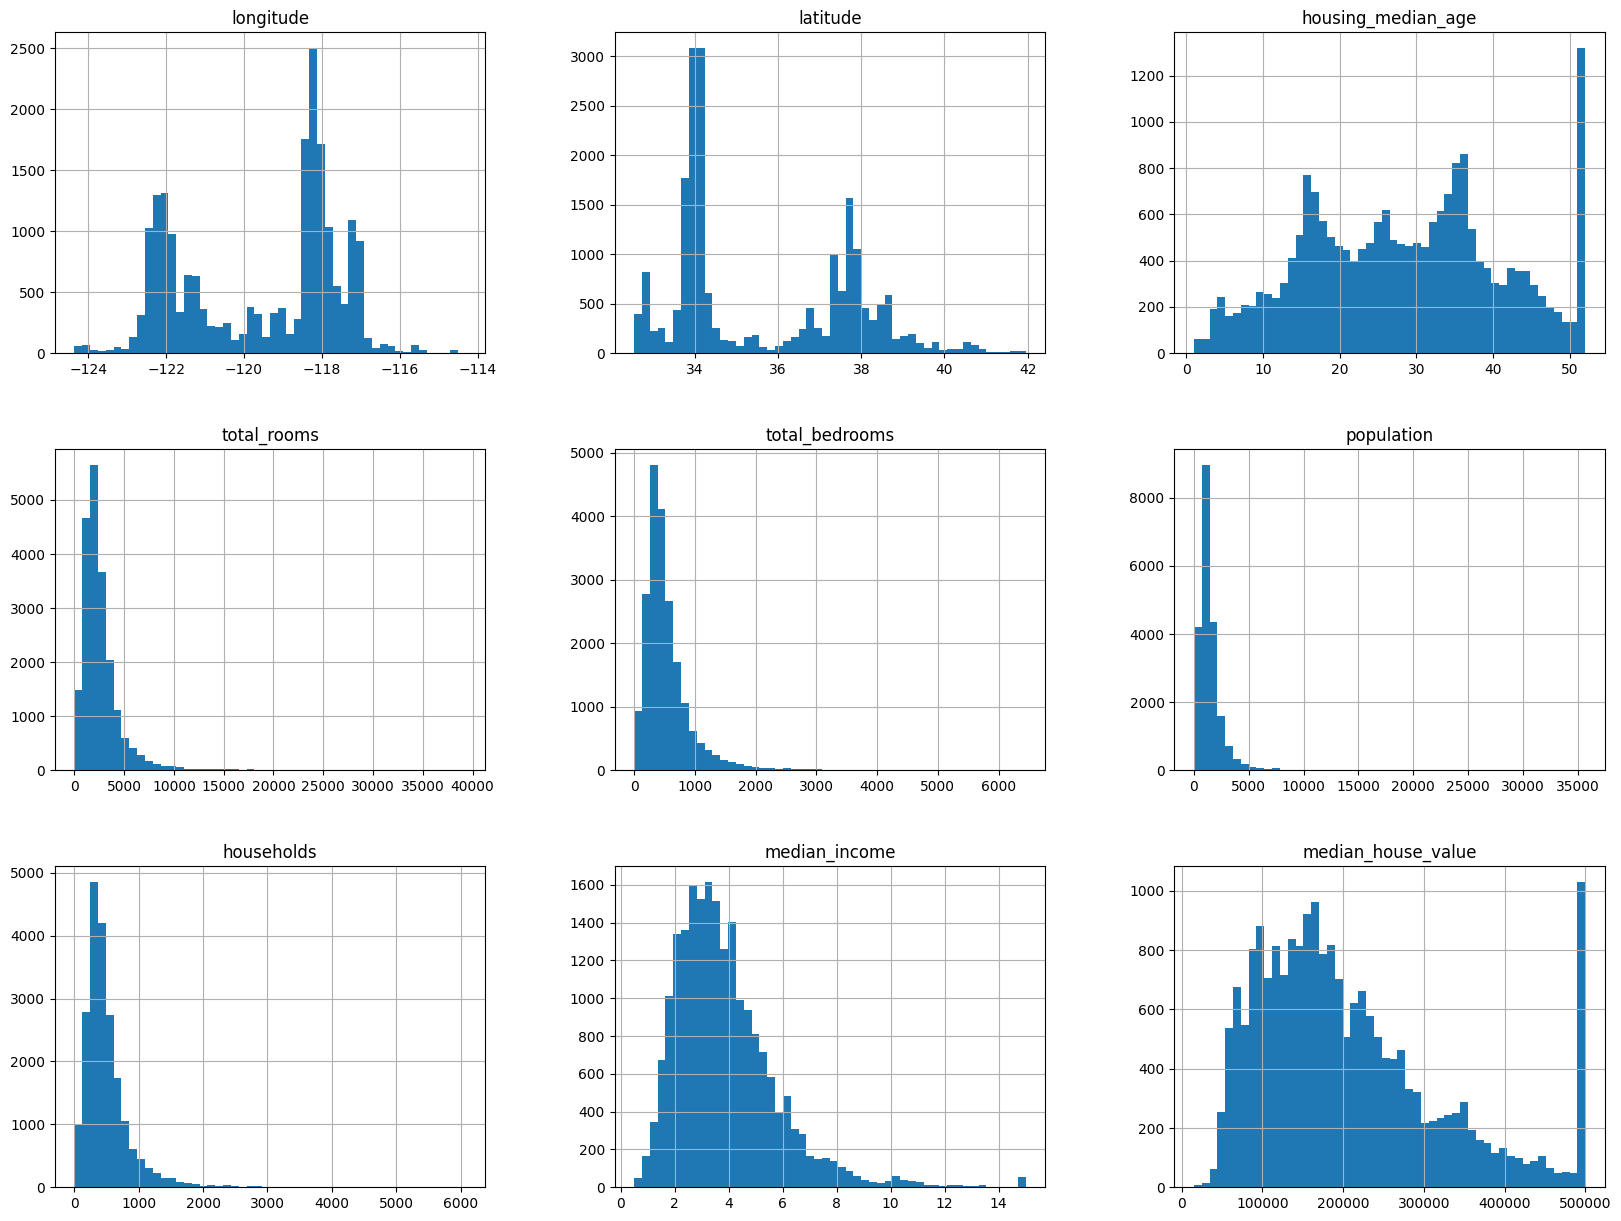

In [7]:

housing.hist(bins=50, figsize=(20,15))
plt.show()

## Separando dados de treino e teste
Para selecionar os dados de treino e teste temos duas abordagens.
- Utilizar função sklearn
- Criar a função com numpy

In [8]:
np.random.seed(99)

In [9]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


### Utilizando Biblioteca sklearn

In [11]:
housing_with_id = housing.reset_index()

In [12]:
dados_treino, dados_teste = train_test_split(housing, test_size=0.2, random_state=99)
print(len(dados_treino), "train +", len(dados_teste), "test")

16512 train + 4128 test


# Criando uma categoria para renda

In [13]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

<ipython-input-13-5b3ac42c6614>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=99)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3.0,0.350533
2.0,0.318798
4.0,0.176357
5.0,0.114341
1.0,0.039971


In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Descubra e visualize os dados para obeter informações

In [16]:
housing = strat_train_set.copy()

# Visualizando dados geográficos

<Axes: xlabel='longitude', ylabel='latitude'>

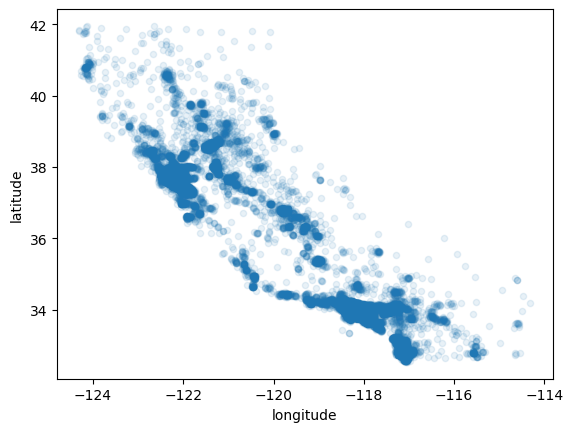

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Após plotar o gráfico é possível ver claramente as áreas de alta densidade de imóveis. Para fazer a relação de densidade e preço vamos plotar o grafico mapeado com o preço médio

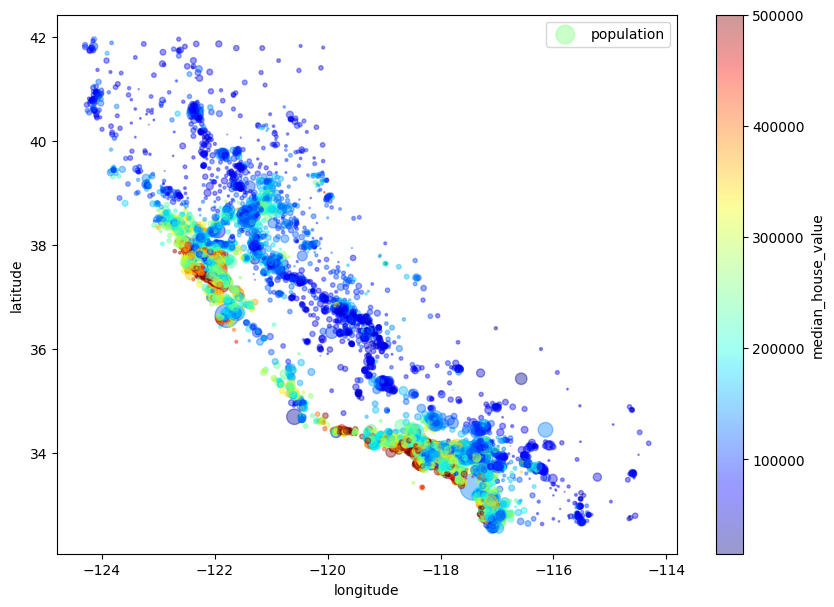

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
  s=housing["population"]/100, label="population", figsize=(10,7),
  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
 )
plt.legend()

# Buscando correlação

In [19]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688716
total_rooms,0.131309
housing_median_age,0.109121
households,0.061645
total_bedrooms,0.046159
population,-0.028896
longitude,-0.043153
latitude,-0.146192


<Axes: >

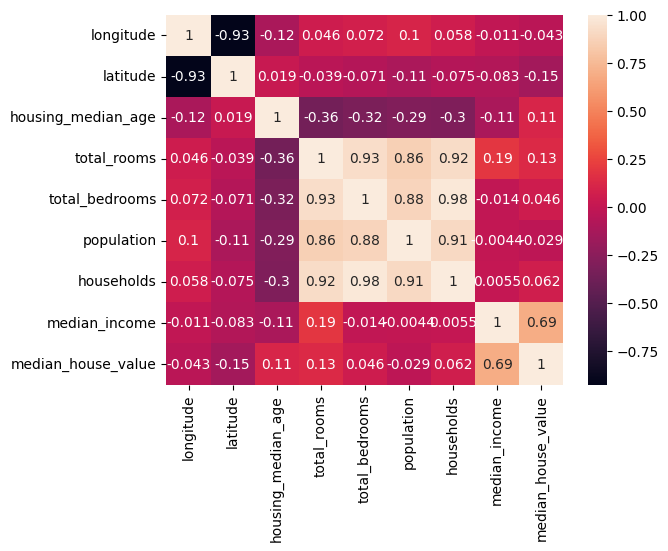

In [20]:
sns.heatmap(corr_matrix, annot=True)

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

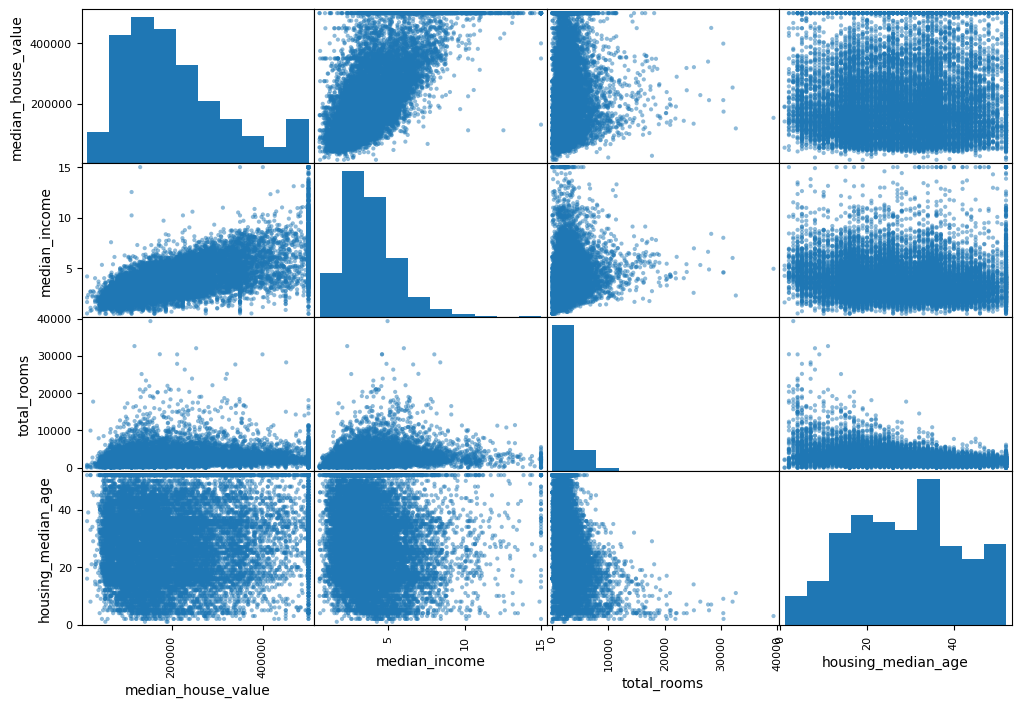

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


A partir dos dados, veremos a representação gráfica das correlações. Vamos pegar a correlação de renda e valor médio da casa

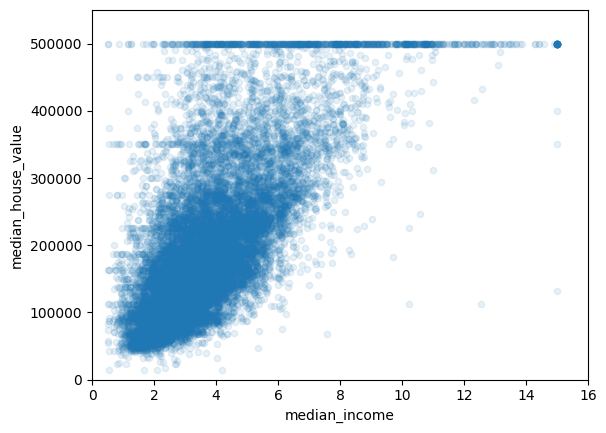

In [22]:

housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

In [23]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]


corr_matrix = housing.select_dtypes(include=[np.number]).corr()

# Exibe as correlações com median_house_value em ordem decrescente
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.688716
rooms_per_household,0.181848
total_rooms,0.131309
housing_median_age,0.109121
households,0.061645
total_bedrooms,0.046159
population,-0.028896
longitude,-0.043153
population_per_household,-0.098311


# Prepare os dados para algoritmos de Aprendizado de Máquina

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Limpando os dados
- Opção 1: utilizando dropna

In [25]:
housing.dropna(subset=['total_bedrooms'])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,<1H OCEAN
11791,-121.19,38.87,20.0,3118.0,500.0,1405.0,519.0,6.0000,INLAND
498,-122.27,37.85,47.0,2077.0,400.0,719.0,326.0,2.2431,NEAR BAY
909,-122.01,37.55,34.0,2791.0,495.0,1276.0,468.0,4.9167,NEAR BAY
403,-122.26,37.90,52.0,1927.0,279.0,705.0,288.0,7.8864,NEAR BAY
...,...,...,...,...,...,...,...,...,...
228,-122.19,37.80,46.0,1938.0,341.0,768.0,332.0,4.2727,NEAR BAY
2478,-120.10,36.21,12.0,1462.0,356.0,1708.0,367.0,1.5086,INLAND
20043,-119.00,36.07,20.0,1042.0,183.0,509.0,175.0,2.9815,INLAND
7103,-118.00,33.89,34.0,1932.0,315.0,1053.0,316.0,5.1377,<1H OCEAN


In [26]:
housing_cat = housing['ocean_proximity']
housing_cat.head()

#Convertendo categorias de texto para núemros
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 2, 2, 2, 1, 0, 1, 3, 0])

In [27]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

# índices das colunas no array numpy
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Usando o transformer
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [29]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
housing_num = housing.select_dtypes(include=[np.number])


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.61356971, -0.73449547,  1.53504009, ..., -0.30433642,
         0.36256102,  0.08570068],
       [-0.81272394,  1.51895554, -0.68842092, ...,  0.30066128,
        -0.11911149, -0.84874615],
       [-1.35132434,  1.04208416,  1.45563077, ...,  0.48136381,
        -0.35738943, -0.33632579],
       ...,
       [ 0.27943798,  0.20989686, -0.68842092, ...,  0.27410149,
        -0.02342063, -0.60602823],
       [ 0.77814205, -0.80929882,  0.42330959, ...,  0.35346969,
         0.17785232, -0.80606429],
       [-2.25397871,  2.45399745,  0.02626298, ..., -0.68582247,
        -0.298538  ,  0.96250063]])

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Atributos numéricos e categóricos
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# Pipeline para atributos numéricos
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Pipeline para atributos categóricos
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Combinando os dois pipelines
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

# Aplicando transformação ao dataset completo
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [34]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))


Predictions: [208412.60156486 210806.69725907 190566.3971973  274271.30000416
 404283.52092373]
Labels: [257800.0, 209400.0, 172700.0, 256300.0, 357300.0]


In [35]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'Erro médio da previsão: {lin_rmse: .2f}')

Erro médio da previsão:  68251.38


Como a média dos bairros vaira entre 120k e 265k, então um erro de margem de 69k é ináceitavel.

# Treinamento com decision tree regressor e outros modelos

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [37]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [39]:
def display_scores(scores):
  print("Scores:", scores)
  print("Média:", scores.mean())
  print("Desvio padrão:", scores.std())

display_scores(tree_rmse_scores)

Scores: [71645.29151095 74651.50012475 69313.7915542  76371.20411498
 70983.12550118 72431.83687531 70060.97986482 68212.15333468
 69298.86159299 63197.01224381]
Média: 70616.57567176476
Desvio padrão: 3441.7673358419074


In [40]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [68091.92018239 70375.83016875 75327.55053209 69336.37630305
 67186.2514659  65857.06905042 66497.94837964 71742.69011195
 74879.1452442  65432.75845302]
Média: 69472.75398914126
Desvio padrão: 3389.2988970603415


In [41]:
from sklearn.ensemble import RandomForestRegressor
rforest_reg = RandomForestRegressor()
rforest_reg.fit(housing_prepared, housing_labels)
forest_rmse_scores = cross_val_score(rforest_reg, housing_prepared, housing_labels,
                                     scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_rmse_scores)
display_scores(forest_rmse_scores)

Scores: [51612.89072184 50961.61671634 49991.74579803 52031.49473486
 47296.49061708]
Média: 50378.847717628836
Desvio padrão: 1687.868312228057


# Ajuste seu modelo

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [44]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [45]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63994.953512225 {'max_features': 2, 'n_estimators': 3}
55169.01500126642 {'max_features': 2, 'n_estimators': 10}
52589.27561443348 {'max_features': 2, 'n_estimators': 30}
58890.03859115192 {'max_features': 4, 'n_estimators': 3}
51975.3257833432 {'max_features': 4, 'n_estimators': 10}
49950.68460647877 {'max_features': 4, 'n_estimators': 30}
58618.13423089961 {'max_features': 6, 'n_estimators': 3}
51551.66728226273 {'max_features': 6, 'n_estimators': 10}
49918.456877893754 {'max_features': 6, 'n_estimators': 30}
58158.787457715676 {'max_features': 8, 'n_estimators': 3}
52296.34686981685 {'max_features': 8, 'n_estimators': 10}
49871.299374625996 {'max_features': 8, 'n_estimators': 30}
62842.13925631182 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54691.209067167365 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
57760.87496563822 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51961.26648476351 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

# Avalie seu sistema em seu conjunto de testes

In [46]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)
print(f"Erro médio (RMSE) no conjunto de teste: {final_rmse}")

Erro médio (RMSE) no conjunto de teste: 48884.476260076146
